---
  title: "EX 06"
  author: "Maksim Kulik"
  format:
    html:
      embed-resources: true
  toc: true
  jupyter: python3
---

## Step 1: Setup and Data Preprocessing

- Start by importing the necessary libraries and load the spam.csv dataset.

- Preprocess the data by encoding categorical variables, defining features and target, and splitting the data into training and testing sets. Finally, apply PCA to reduce dimensionality.

### Importing the libraries

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Metrics for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix


sns.set(font_scale = 1.25)
sns.set_style("white")


### Data overview

In [7]:
spam = pd.read_csv('data/spam.csv')
print(f'First 5 rows:\n{spam.head()}', f'Data types:\n{spam.dtypes}', f'The dataset contains {spam.shape[0]} rows and {spam.shape[1]} columns.', sep='\n\n')

First 5 rows:
   crl.tot  dollar   bang  money  n000  make yesno
0      278   0.000  0.778   0.00  0.00  0.00     y
1     1028   0.180  0.372   0.43  0.43  0.21     y
2     2259   0.184  0.276   0.06  1.16  0.06     y
3      191   0.000  0.137   0.00  0.00  0.00     y
4      191   0.000  0.135   0.00  0.00  0.00     y

Data types:
crl.tot      int64
dollar     float64
bang       float64
money      float64
n000       float64
make       float64
yesno       object
dtype: object

The dataset contains 4601 rows and 7 columns.


### Encoding categorical variables

In [8]:
categorical_columns = spam.select_dtypes(include = ['object', 'category']).columns.tolist()
label_encoders = {col: LabelEncoder() for col in categorical_columns}
for col in categorical_columns:
    spam[col] = label_encoders[col].fit_transform(spam[col])

### Preparation for training

In [10]:
X = spam.drop('yesno', axis = 1)
y = spam['yesno']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

pca = PCA(n_components = 2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 2: Model Training and Decision Boundary Visualization

- Train a Decision Tree classifier on the PCA-transformed training data.

- Implement and use the `decisionplot` function (from the lecture) to visualize the decision boundary of your trained model.

### Training

In [ ]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train_pca, y_train)


### Decisionplot

c:\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


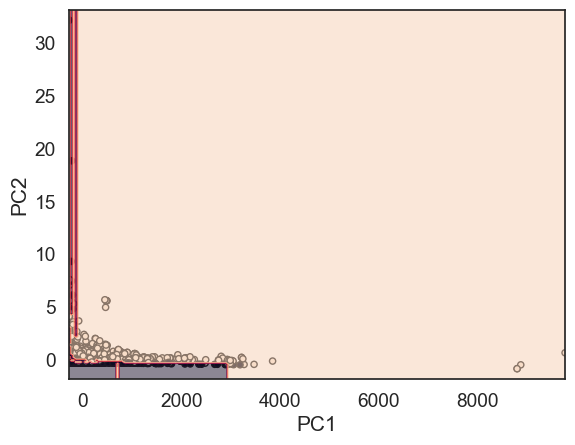

In [17]:
# Implement the decisionplot function (as provided in the lecture content)
def decisionplot(model, X, y, resolution=216):
    # Split the data into features (X) and the class variable (y)
    x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
    y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, resolution),
                         np.linspace(y_min, y_max, resolution))

    # Predict outcomes for each point on the grid
    if isinstance(model, LinearDiscriminantAnalysis):
        # For LDA, we need to use the decision_function method
        Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    if isinstance(model, LinearDiscriminantAnalysis):
    # Reshape LDA decision function output appropriately
        Z = Z.reshape(-1, 1)
    else:
        Z = Z.reshape(xx.shape)

    # Plot the actual data points
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors='k', s=20)

    # Overlay the decision boundary
    plt.contourf(xx, yy, Z, alpha = 0.5)
    
    # Calculate the accuracy
    predictions = model.predict(X)
    acc = accuracy_score(y, predictions)
    
  
    # Set labels for axes
    plt.xlabel(X.columns[0])
    plt.ylabel(X.columns[1])

    plt.show()

# Visualize decision boundary
decisionplot(dtree, pd.DataFrame(X_train_pca, columns = ['PC1', 'PC2']), y_train)

## Step 3: Model Evaluation

- Evaluate your model using accuracy, precision, recall, F1 score, and AUC-ROC metrics.

In [29]:
predictions = dtree.predict(X_test_pca)

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"Precision: {precision:.2f}")

recall = recall_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"Recall: {recall:.2f}")

f1 = f1_score(y_test, predictions, average = 'weighted') # Use 'weighted' for multiclass
print(f"F1 Score: {f1:.2f}")

roc_auc_macro = roc_auc_score(y_test, predictions)
print(f"Macro-average ROC-AUC: {roc_auc_macro:.2f}")

roc_auc_micro = roc_auc_score(y_test, predictions, average='micro')
print(f"Micro-average ROC-AUC: {roc_auc_micro:.2f}")

Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1 Score: 0.81
Macro-average ROC-AUC: 0.80
Micro-average ROC-AUC: 0.80


## Assignment:
- Implement the missing parts of the code: the decisionplot function and AUC-ROC calculation.

- Discuss the results among your peers. Consider the following:

    - Which metric is most informative for this problem and why?

    - How does the decision boundary visualization help in understanding the model’s performance?

    - Reflect on the impact of PCA on model performance and decision boundary.

